In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as datetime

In [3]:
covid_df = pd.read_csv(r'C:\Users\HP\Documents\Simplilearn projects\covid_19_india.csv')
covid_df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [5]:
covid_df.shape

(15114, 9)

In [6]:
print(covid_df.isnull().sum())

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64


In [7]:
covid_df = covid_df.dropna()
print(covid_df.isnull().sum())

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [9]:
covid_df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace=True, axis=1)
covid_df.head(2)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0


In [10]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')
covid_df.head(2)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0


In [73]:
vaccine_df = pd.read_csv(r'C:\Users\HP\Documents\Simplilearn projects\covid_vaccine_statewise.csv')
vaccine_df.head(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [74]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [75]:
vaccine_df.shape

(7845, 24)

In [76]:
print(vaccine_df.isnull().sum())

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [77]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [22]:
#Finding duplicates

duplicates = covid_df[covid_df.duplicated()]
duplicates

,Date,State/UnionTerritory,Cured,Deaths,Confirmed


In [23]:
#Active cases

covid_df['Active cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df['Active cases']

0             1.0
1             1.0
2             2.0
3             3.0
4             3.0
           ...   
15081     48110.0
15082      5924.0
15083     76232.0
15084    136342.0
15085    131793.0
Name: Active cases, Length: 15086, dtype: float64

In [96]:
covid_df.head(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active cases
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0


In [27]:
statewise = pd.pivot_table(covid_df, values=['Confirmed', 'Deaths', 'Cured'], index = 'State/UnionTerritory',
                          aggfunc=max)
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,6674.0,6359.0,92.0
Andhra Pradesh,1475372.0,1254291.0,9580.0
Arunachal Pradesh,22462.0,19977.0,88.0
Assam,340858.0,290774.0,2344.0
Bihar,664115.0,595377.0,4039.0
Cases being reassigned to states,9265.0,0.0,0.0
Chandigarh,56513.0,48831.0,647.0
Chhattisgarh,925531.0,823113.0,12036.0
Dadra and Nagar Haveli and Daman and Diu,9652.0,8944.0,4.0


In [29]:
statewise['Recovery rate'] = (statewise['Cured']/statewise['Confirmed']) * 100


In [30]:
statewise['Mortality rate'] = (statewise['Deaths']/statewise['Confirmed']) * 100

In [32]:
statewise = statewise.sort_values(by = 'Confirmed', ascending=False)

In [33]:
statewise

,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UnionTerritory,,,,,
Maharashtra,5433506.0,4927480.0,83777.0,90.686934,1.541859
Karnataka,2272374.0,1674487.0,22838.0,73.688882,1.005028
Kerala,2200706.0,1846105.0,6612.0,83.886944,0.300449
Tamil Nadu,1664350.0,1403052.0,18369.0,84.300297,1.103674
Uttar Pradesh,1637663.0,1483249.0,18072.0,90.571076,1.103524
Andhra Pradesh,1475372.0,1254291.0,9580.0,85.015237,0.649328
Delhi,1402873.0,1329899.0,22111.0,94.798246,1.576123
West Bengal,1171861.0,1026492.0,13576.0,87.595030,1.158499
Chhattisgarh,925531.0,823113.0,12036.0,88.934136,1.300443


In [43]:
#top 10 active states

top10_activecases = covid_df.groupby(by='State/UnionTerritory').max()[['Active cases', 'Date']].sort_values(by=['Active cases'],ascending = False).reset_index()
top10_activecases = top10_activecases.head(10)


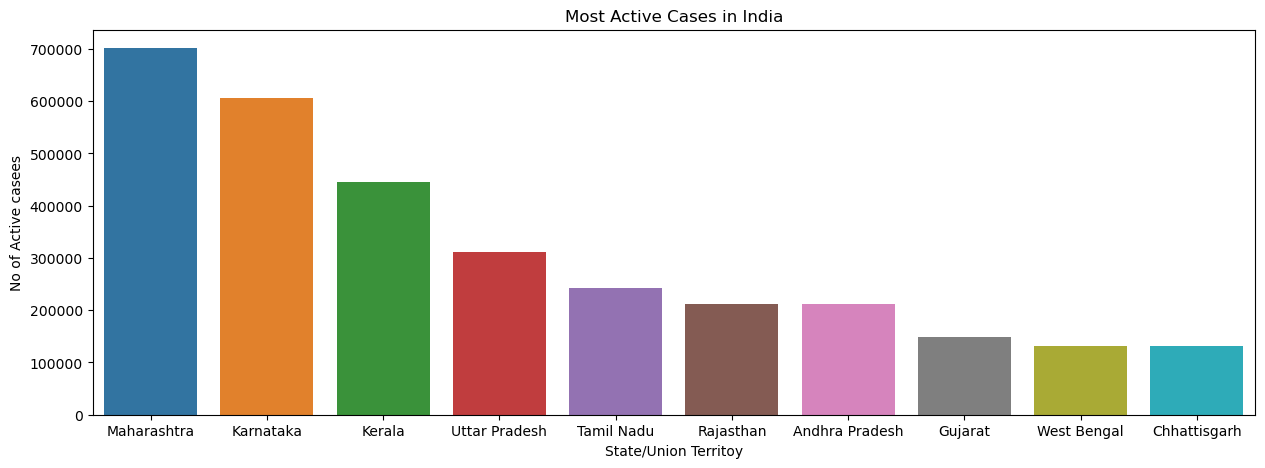

In [45]:
fig = plt.figure(figsize=(15, 5))

ax = sns.barplot(data=top10_activecases, x = 'State/UnionTerritory', y='Active cases')
plt.title('Most Active Cases in India')
plt.xlabel('State/Union Territoy')
plt.ylabel('No of Active casees')

plt.show()

In [47]:
#Top 10 states with highest deaths

top10_deaths = covid_df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by='Deaths', ascending=False).reset_index()
top10_deaths=top10_deaths.head(10)

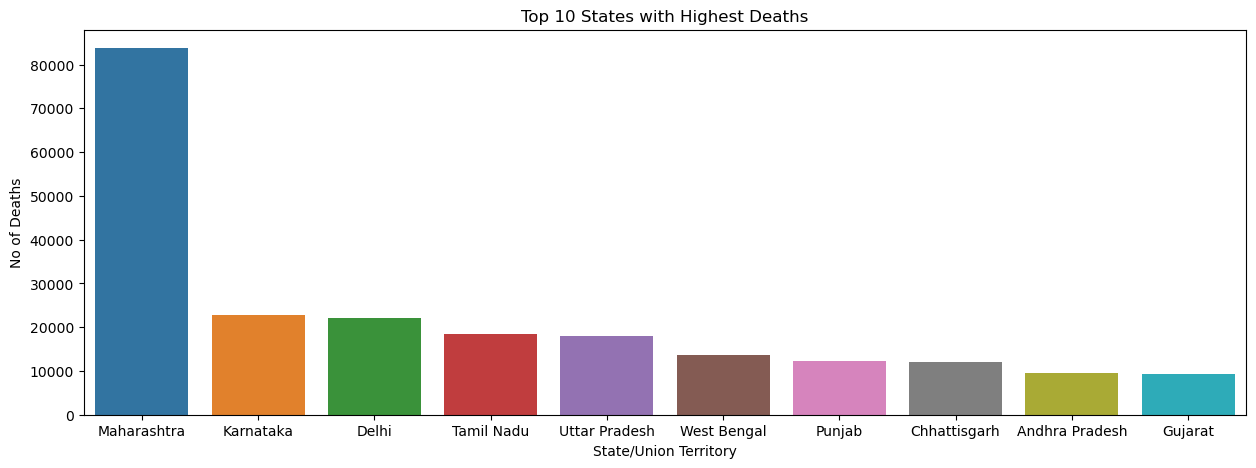

In [48]:
fig = plt.figure(figsize=(15,5))

ax = sns.barplot(data=top10_deaths, x='State/UnionTerritory', y='Deaths')
plt.title('Top 10 States with Highest Deaths')
plt.xlabel('State/Union Territory')
plt.ylabel('No of Deaths')

plt.show()

In [51]:
#Top 10 States with most cured patients

top10_cured = covid_df.groupby(by='State/UnionTerritory').max()[['Cured', 'Date']].sort_values(by='Cured', ascending=False).reset_index()
top10_cured = top10_cured.head(10)

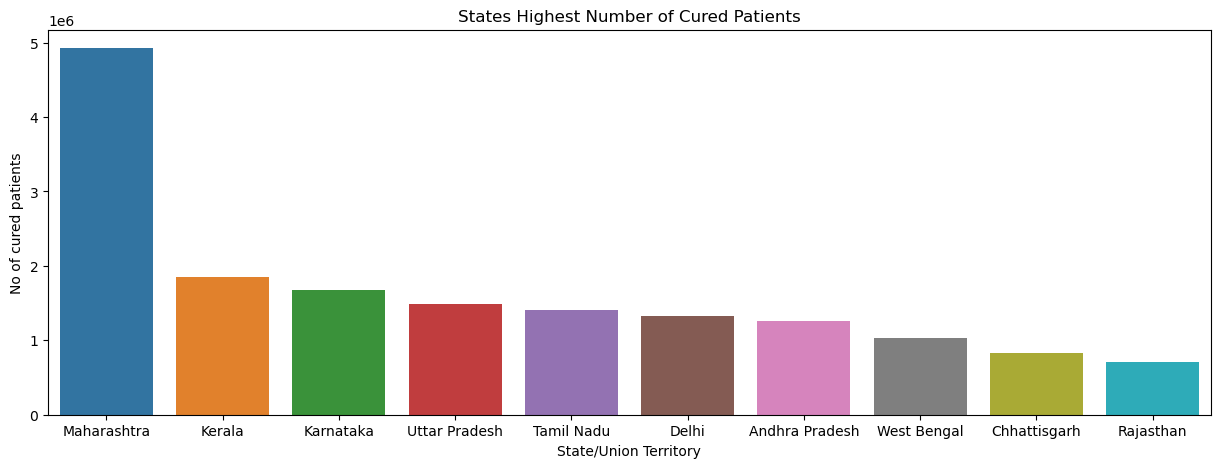

In [54]:
#Plot the graph

fig = plt.figure(figsize=(15, 5))

ax=sns.barplot(data=top10_cured, x='State/UnionTerritory', y='Cured')
plt.title('States Highest Number of Cured Patients')
plt.ylabel('No of cured patients')
plt.xlabel('State/Union Territory')

plt.show()

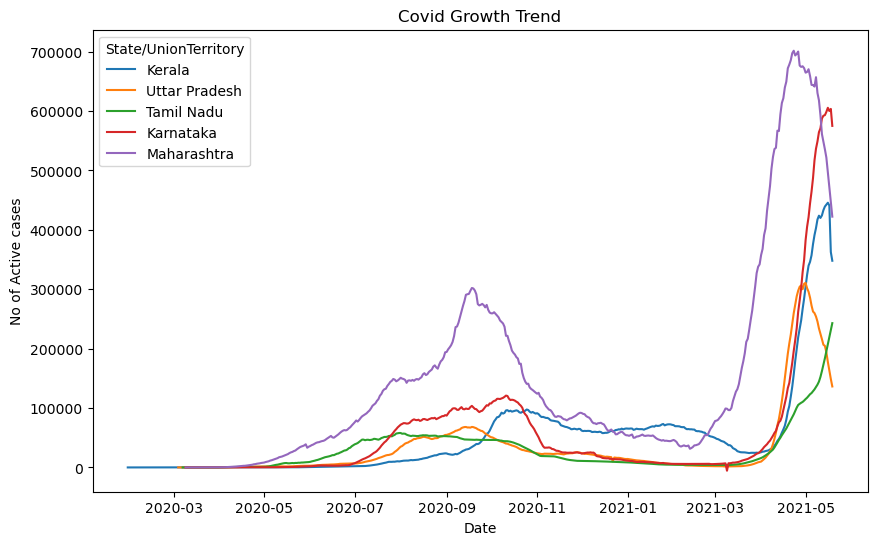

In [58]:
#Growth trend

fig = plt.figure(figsize=(10,6))

ax=sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh',])], x='Date', y='Active cases', hue='State/UnionTerritory')
plt.title('Covid Growth Trend')
plt.xlabel('Date')
plt.ylabel('No of Active cases')

plt.show()

In [78]:
vaccine_df.head(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [79]:
vaccine_df.rename(columns={'Updated On':'Vaccine Date'}, inplace=True)
vaccine_df.head(2)

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0


In [80]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [83]:
vaccination = vaccine_df.drop(['Sputnik V (Doses Administered)','AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)',
                '60+ Years (Doses Administered)'], axis=1)

vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [97]:
#Male vs Female Vaccination

male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()

px.pie(names= ['Male', 'Female'], values=[male, female], title='Male and Female Vaccination')

In [85]:
#Remove rows where state is India

vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
vaccine.rename(columns={'Total Individuals Vaccinated': 'Total'}, inplace=True)
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7633 entries, 212 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7633 non-null   object 
 1   State                                7633 non-null   object 
 2   Total Doses Administered             7415 non-null   float64
 3   Sessions                             7415 non-null   float64
 4    Sites                               7415 non-null   float64
 5   First Dose Administered              7415 non-null   float64
 6   Second Dose Administered             7415 non-null   float64
 7   Male (Doses Administered)            7415 non-null   float64
 8   Female (Doses Administered)          7415 non-null   float64
 9   Transgender (Doses Administered)     7415 non-null   float64
 10   Covaxin (Doses Administered)        7415 non-null   float64
 11  CoviShield (Doses Administer

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\1140320648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
#Most Vaccinated States

max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values(by='Total', ascending=False)
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08
Karnataka,8.685235e+08
Madhya Pradesh,7.718640e+08
Bihar,6.608479e+08
Kerala,6.208252e+08


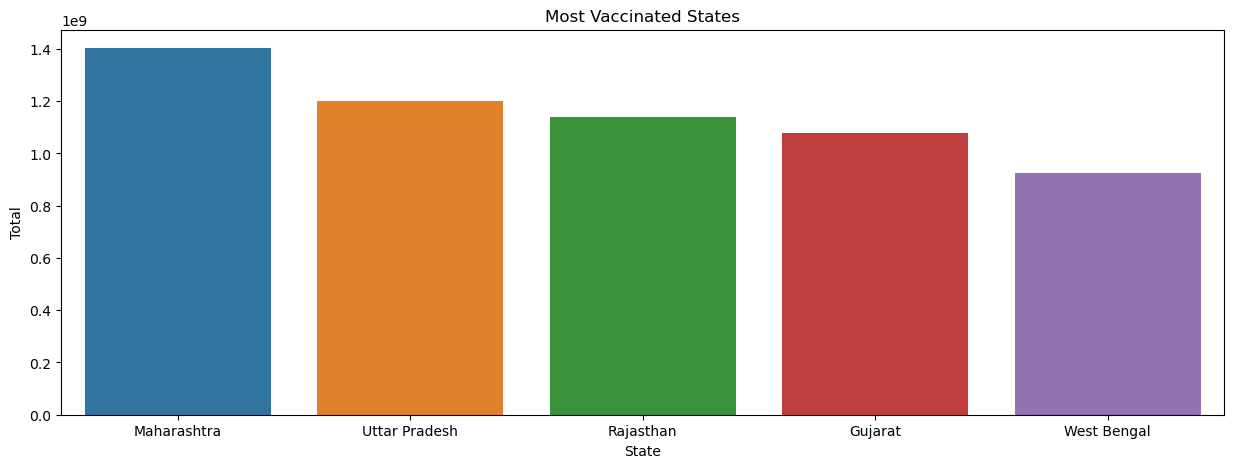

In [95]:
top5_vac = max_vac.head(5)
fig = plt.figure(figsize=(15, 5))

ax= sns.barplot(data=top5_vac, x=top5_vac.index,y=top5_vac.Total)
plt.title('Most Vaccinated States')
plt.xlabel('State')
plt.ylabel('Total')

plt.show()

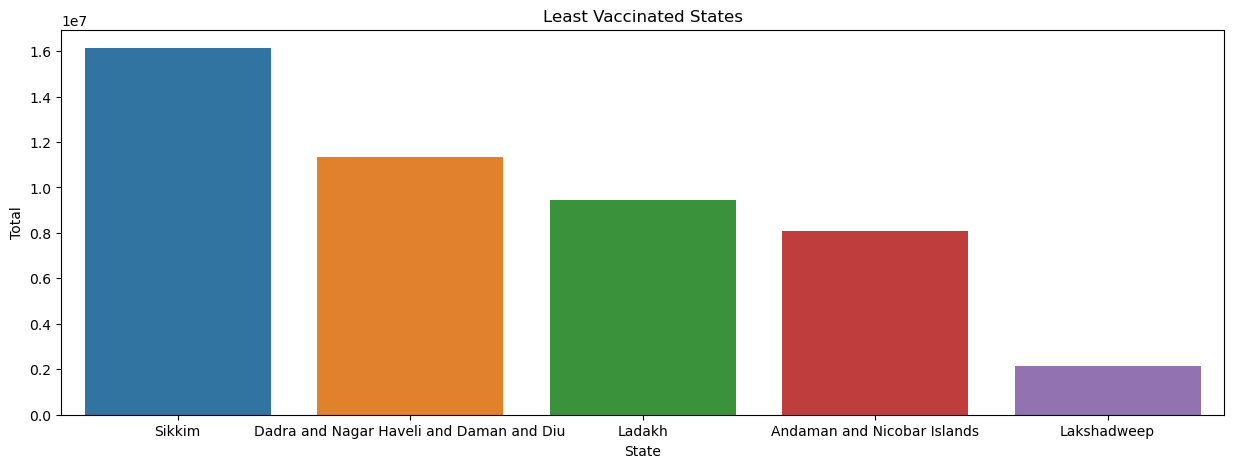

In [102]:
#Top 5 states with the least vaccination rates

top5_leastvac = max_vac.tail(5)

fig = plt.figure(figsize=(15, 5))
ax=sns.barplot(data=top10_leastvac, x=top5_leastvac.index, y=top5_leastvac.Total)

plt.title('Least Vaccinated States')
plt.xlabel('State')
plt.ylabel('Total')

plt.show()